### Generating and Visualizing Uniform Distribution for LPN Instances

This notebook demonstrates the process of generating Learning Parity with Noise (LPN) instances to explore the uniform distribution of binary outcomes. The methodology involves adding noise to binary vectors and analyzing the resulting distribution. Below are the key components and their descriptions:

---

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#generating random vectors
def genvec(m, n):
    return np.random.randint(0, 2, (m, n))

Adding noise to computation, Instead of probability 1/3, we  choose exactly m/3 many bits to be noisy randomly.

In [6]:
def noisepat(m):
    p = np.zeros(m, dtype=int)
    pis = np.random.choice(range(m), size=m//3, replace=False)
    p[pis] = 1
    return p

In [7]:
def comp_b(a, u, noise_pat):
    m, n = a.shape
    b_s = np.zeros(m, dtype=int)
    for i in range(m):
        b_s[i] = np.dot(a[i], u) % 2  # a_i . u mod 2
        b_s[i] = (b_s[i] + noise_pat[i]) % 2  # Adding noise
    return b_s


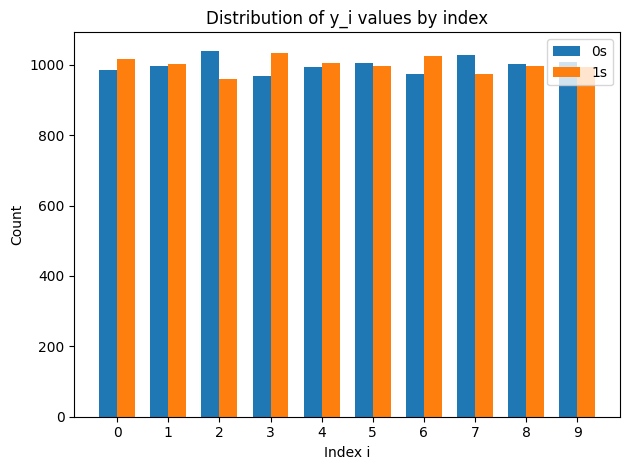

In [8]:
m = 10  # Number of vectors
n = 5   # dimension
runs = 2000  

# secret
u = np.random.randint(0, 2, n)

#settings for displaying plots
count= np.zeros((m, 2), dtype=int)  # First column for 0's, second column for 1's

# Run the instance multiple times
for _ in range(runs):
    a = genvec(m, n)
    noise_pat = noisepat(m)
    b_s = comp_b(a, u, noise_pat)
    
    # Update count
    for i, b in enumerate(b_s):
        count[i, b] += 1

# Plotting the results
x = np.arange(m)
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, count[:, 0], width, label='0s')
rects2 = ax.bar(x + width/2, count[:, 1], width, label='1s')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Index i')
ax.set_ylabel('Count')
ax.set_title('Distribution of y_i values by index')
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.legend()

fig.tight_layout()
plt.show()

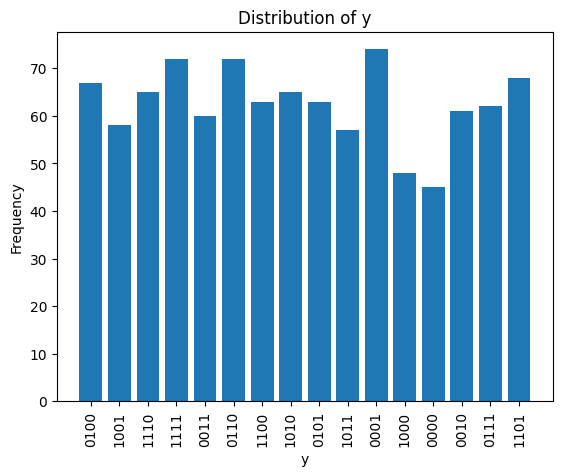

{'0100': 67, '1001': 58, '1110': 65, '1111': 72, '0011': 60, '0110': 72, '1100': 63, '1010': 65, '0101': 63, '1011': 57, '0001': 74, '1000': 48, '0000': 45, '0010': 61, '0111': 62, '1101': 68}


In [9]:
def generate_lpn_instance(n, m, p, u=None):
    if u is None:
        u = np.random.randint(2, size=n, dtype=np.uint8)#we can also have a predefined u
    A = np.random.randint(2, size=(m, n), dtype=np.uint8)
    e = np.random.binomial(1, p, size=m).astype(np.uint8)
    b = (np.dot(A, u) + e) % 2
    return A, b

#plotting the distribution of y_i
def plot_distribution(values):
    plt.bar(values.keys(), values.values())
    plt.xlabel('y')
    plt.ylabel('Frequency')
    plt.title('Distribution of y')
    plt.xticks(rotation=90)
    plt.show()

n = 10 #dim
m = 4 #samples
p = 0.75 #noise

values = {}

# Generate 500 LPN instances
for i in range(1000):
  a = ''
  A, b = generate_lpn_instance(n=n, m=m, p=p)

  for i in b:
    a += str(i)

  if a not in values:
    values[a] = 1      
  else:
    values[a] += 1     #

#Plot the distribution and print the values
plot_distribution(values)
print(values)
